# **MULTIPLE LINEAR REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## **Assignment Task:**

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

## **Dataset Description:**

The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax:

Price: Offer Price in EUROs


Load the Dataset

In [ ]:
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.347849,0.368885
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885


## **Taskes:**

### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

## Summary Statistics

In [ ]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

## Visualizations

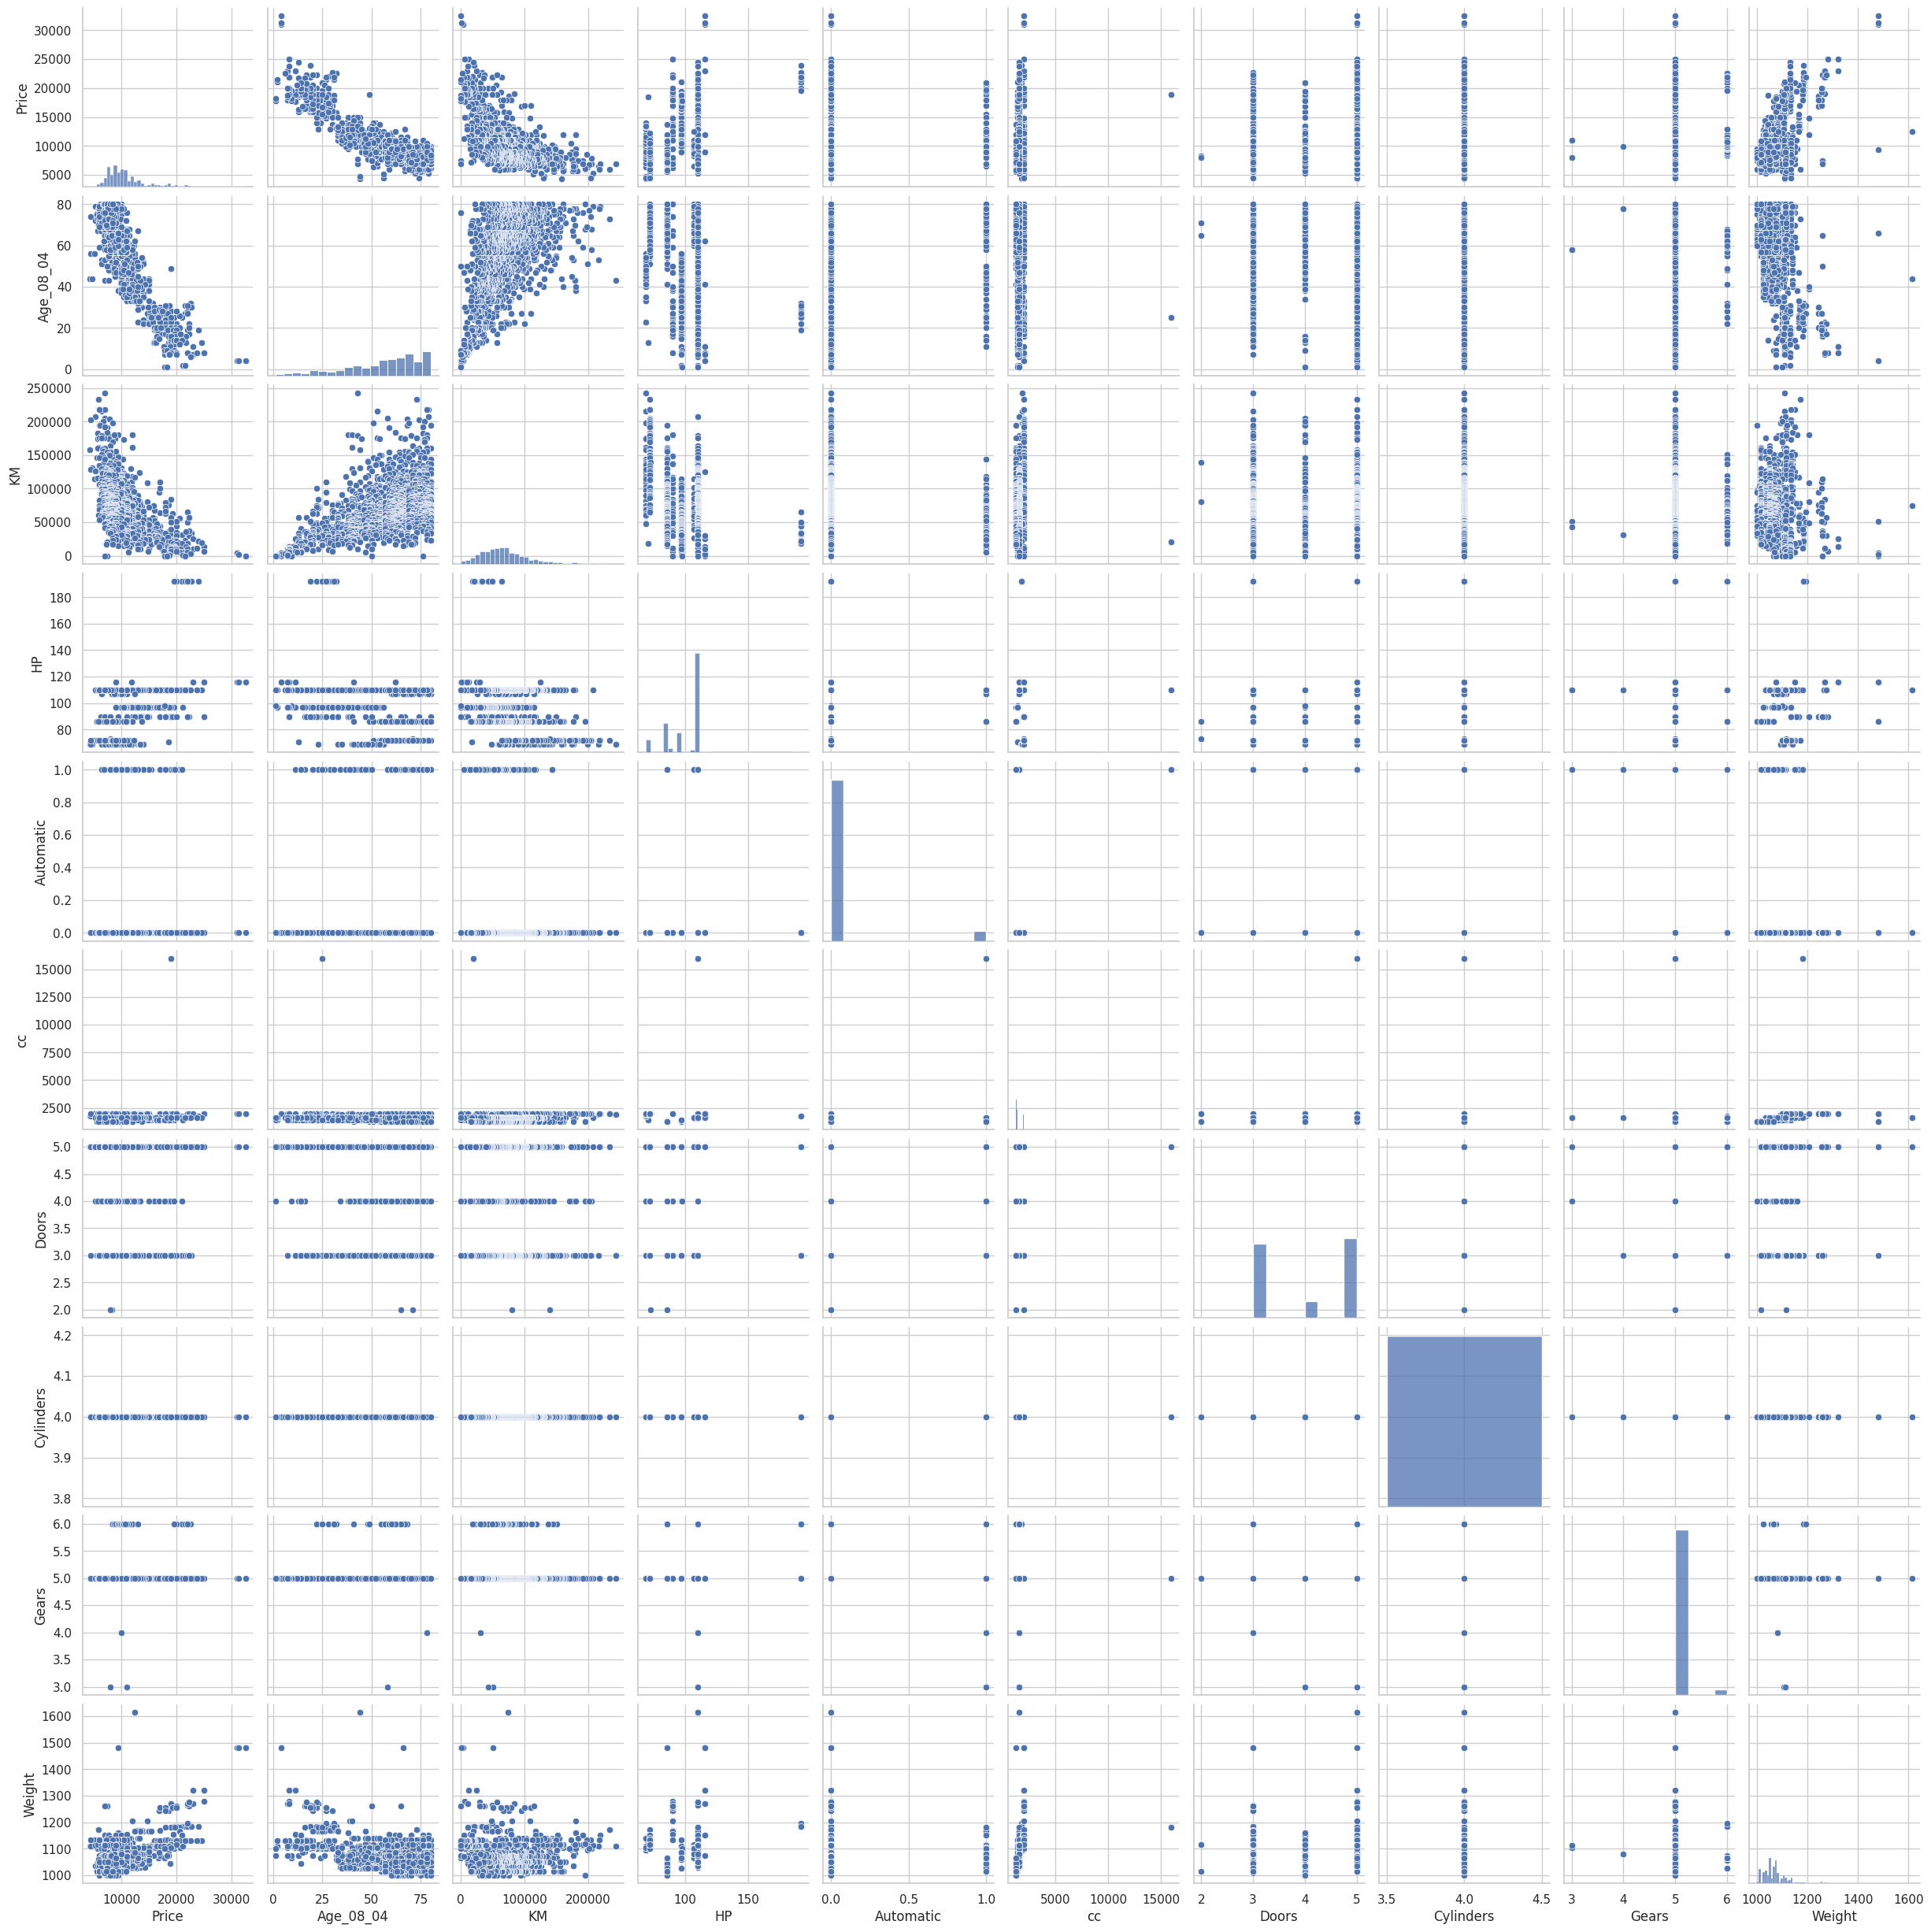

In [ ]:
sns.pairplot(df)
plt.show()

Convert 'FuelType' to numerical using one-hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

## Correlation heatmap

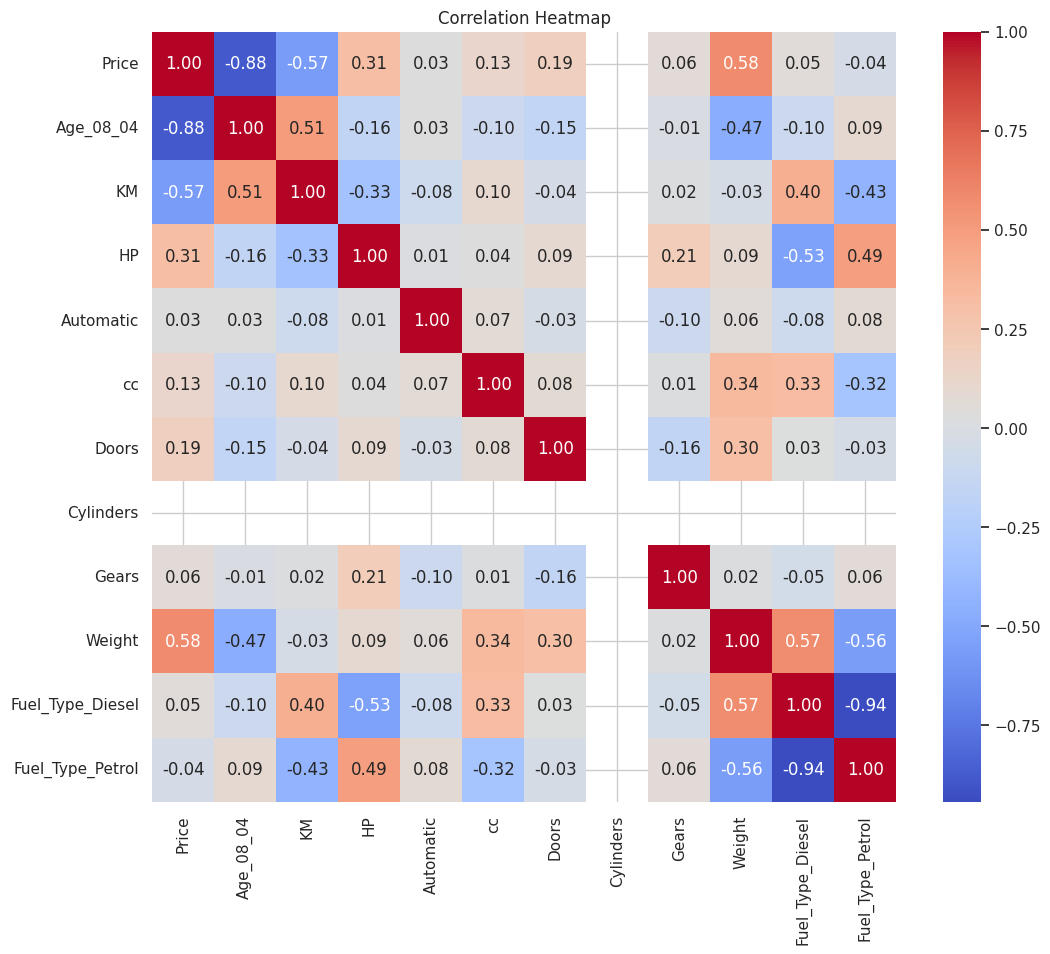

In [ ]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **Data preprocessing:**

## Preprocess the data by handling missing values, encoding categorical variables, and scaling the features if necessary.

### Handling missing values

In [ ]:
df.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()

In [ ]:
df[df.columns] = scaler.fit_transform(df)

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
X = df.drop(columns=['Price'])

In [ ]:
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

### **Model 1:**

### Using all features

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X_train, y_train)

LinearRegression()

### **Model 2:**

### Using selected features

In [ ]:
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight',]
model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)

LinearRegression()

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X_train[selected_features], y_train)

LinearRegression()

### **Model 3:**

### Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model3 = LinearRegression()
model3.fit(X_poly, y_train)

LinearRegression()

### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

In [ ]:
print("Model 1:")
evaluate_model(model1, X_test, y_test)

print("\nModel 2:")
evaluate_model(model2, X_test[selected_features], y_test)

print("\nModel 3:")
X_poly_test = poly.transform(X_test)
evaluate_model(model3, X_poly_test, y_test)

Model 1:
Mean Squared Error: 0.1675865054809421
R-squared: 0.8348888040611082

Model 2:
Mean Squared Error: 0.1516327997457371
R-squared: 0.8506068681500834

Model 3:
Mean Squared Error: 0.24330211306669536
R-squared: 0.7602915416869892


### 5.Apply Lasso and Ridge methods on the model.

### Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso:")
evaluate_model(lasso, X_test, y_test)

Lasso:
Mean Squared Error: 0.17400385240333016
R-squared: 0.8285662435299397


### Ridge

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print("\nRidge:")
evaluate_model(ridge, X_test, y_test)


Ridge:
Mean Squared Error: 0.16756839683247823
R-squared: 0.8349066452386906


# **Interview Questions**

## 1.What is Normalization & Standardization and how is it helpful?

## Normalization

### Normalization scales the values of your data to fit within a specific range, usually between 0 and 1. It’s like taking all your values and squishing them so that the smallest value is 0 and the largest value is 1.

**Why It is useful** -
It makes sure that features with larger ranges don’t dominate the model, especially when using algorithms that rely on distances or gradients to learn.

## Standardization

### Standardization changes the values of your data so that they have a mean of 0 and a standard deviation of 1. In simple terms, it makes the data look more like a standard bell curve (a normal distribution).

**Why It is useful** -
It makes sure all the features contribute equally to the model, which helps improve its performance, especially when using linear regression or models that assume data has a bell-shaped curve.

## 2.What techniques can be used to address multicollinearity in multiple linear regression?

**1. Remove One of the Highly Correlated Variables**

**2. Combine Correlated Variables**

**3. Use Regularization Techniques (Ridge or Lasso Regression)**

**4. Principal Component Analysis (PCA)**

**5. Increase the Sample Size**

**6. Variance Inflation Factor (VIF)**